In [1]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 98% 214M/218M [00:06<00:00, 36.3MB/s]
100% 218M/218M [00:06<00:00, 36.3MB/s]


In [2]:

import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content/cat-and-dog-dataset')
zip_ref.close()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import os
import cv2 as cv
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:

# Image size
image_size = (224, 224)

# Data directories
data_dir = '/content/cat-and-dog-dataset/test_set/test_set'
categories = ['cats', 'dogs']

# Dataset lists
datasets = []

# Load and preprocess images
for category in categories:
    class_label = categories.index(category)
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        try:
            # Load and resize the image
            img_path = os.path.join(path, img)
            image = cv.imread(img_path)
            if image is not None:
                image = cv.resize(image, image_size)
                # print(class_labelA)
                datasets.append([image, class_label])
        except Exception as e:
            print(f"Error loading image {img}: {e}")



In [5]:
datasets[0]

[array([[[113, 132, 140],
         [106, 125, 133],
         [104, 122, 131],
         ...,
         [  8,  10,  51],
         [  9,  10,  54],
         [ 10,  11,  55]],
 
        [[113, 132, 140],
         [107, 126, 134],
         [104, 123, 131],
         ...,
         [ 12,  15,  57],
         [ 15,  16,  60],
         [ 14,  17,  61]],
 
        [[122, 141, 149],
         [118, 137, 145],
         [116, 135, 143],
         ...,
         [ 15,  19,  63],
         [ 17,  19,  66],
         [ 16,  20,  68]],
 
        ...,
 
        [[180, 195, 199],
         [179, 194, 197],
         [176, 191, 194],
         ...,
         [177, 193, 199],
         [170, 186, 192],
         [179, 195, 200]],
 
        [[182, 197, 200],
         [182, 197, 200],
         [180, 195, 198],
         ...,
         [175, 191, 197],
         [178, 194, 200],
         [194, 210, 216]],
 
        [[184, 199, 202],
         [185, 200, 203],
         [186, 201, 204],
         ...,
         [194, 209, 215],
  

In [6]:
c,d=datasets[0]

In [7]:
np.array(c).shape

(224, 224, 3)

In [8]:
# Shuffle the dataset
random.shuffle(datasets)

# Split features and labels
features = []
labels = []

for image, label in datasets:
    # print(np.array(image))
    features.append(image)
    labels.append(label)

# Convert to numpy arrays
features = np.array(features, dtype=np.float32) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Print dataset information
print(f"Number of samples: {len(features)}")
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")



Number of samples: 2023
Features shape: (2023, 224, 224, 3)
Labels shape: (2023,)


In [9]:
features[0]

array([[[0.02745098, 0.02352941, 0.03921569],
        [0.03529412, 0.03137255, 0.04705882],
        [0.03921569, 0.03529412, 0.05098039],
        ...,
        [0.20392157, 0.2       , 0.23529412],
        [0.27450982, 0.26666668, 0.30588236],
        [0.40392157, 0.4       , 0.43529412]],

       [[0.02352941, 0.01960784, 0.03529412],
        [0.02745098, 0.02352941, 0.03921569],
        [0.03137255, 0.02745098, 0.04313726],
        ...,
        [0.20392157, 0.2       , 0.23529412],
        [0.27058825, 0.26666668, 0.30588236],
        [0.4       , 0.39607844, 0.43137255]],

       [[0.01960784, 0.01176471, 0.02745098],
        [0.01960784, 0.01960784, 0.03529412],
        [0.02352941, 0.01960784, 0.03529412],
        ...,
        [0.20784314, 0.2       , 0.23529412],
        [0.27450982, 0.26666668, 0.30588236],
        [0.4       , 0.39607844, 0.43137255]],

       ...,

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00784314, 0

In [10]:
features[0]

array([[[0.02745098, 0.02352941, 0.03921569],
        [0.03529412, 0.03137255, 0.04705882],
        [0.03921569, 0.03529412, 0.05098039],
        ...,
        [0.20392157, 0.2       , 0.23529412],
        [0.27450982, 0.26666668, 0.30588236],
        [0.40392157, 0.4       , 0.43529412]],

       [[0.02352941, 0.01960784, 0.03529412],
        [0.02745098, 0.02352941, 0.03921569],
        [0.03137255, 0.02745098, 0.04313726],
        ...,
        [0.20392157, 0.2       , 0.23529412],
        [0.27058825, 0.26666668, 0.30588236],
        [0.4       , 0.39607844, 0.43137255]],

       [[0.01960784, 0.01176471, 0.02745098],
        [0.01960784, 0.01960784, 0.03529412],
        [0.02352941, 0.01960784, 0.03529412],
        ...,
        [0.20784314, 0.2       , 0.23529412],
        [0.27450982, 0.26666668, 0.30588236],
        [0.4       , 0.39607844, 0.43137255]],

       ...,

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00784314, 0

In [11]:

# Split into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Print splits
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (1416, 224, 224, 3), (1416,)
Validation set: (303, 224, 224, 3), (303,)
Test set: (304, 224, 224, 3), (304,)


In [66]:
from tensorflow.keras.applications import(
    VGG16,
    VGG19,
    ResNet50,
    ResNet101,
    ResNet152,
    InceptionV3,
    InceptionResNetV2,
    Xception,
    EfficientNetB0,
    EfficientNetB1,
    EfficientNetB2,
    EfficientNetB3,
    EfficientNetB4,
    EfficientNetB5,
    EfficientNetB6,
    EfficientNetB7,
)

In [67]:
base_model = VGG16()
print(base_model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [68]:
# Build the model
model = Sequential()
for layer in base_model.layers[0:-1]:
    model.add(layer)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Freeze all layers initially
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 134,260,544 (512.16 MB)

In [70]:
# Add new layers for binary classification
model.add(Flatten(name='flatten_new'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,981,185 (530.17 MB)

 Trainable params: 4,720,641 (18.01 MB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [71]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_call = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    shuffle=True,
    callbacks=[early_call]
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.5382 - loss: 0.8209 - val_accuracy: 0.7393 - val_loss: 0.4820
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.7978 - loss: 0.4458 - val_accuracy: 0.8515 - val_loss: 0.3582
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8656 - loss: 0.3361 - val_accuracy: 0.7954 - val_loss: 0.4017
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8147 - loss: 0.3751 - val_accuracy: 0.8548 - val_loss: 0.3037
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.8717 - loss: 0.3046 - val_accuracy: 0.8680 - val_loss: 0.2720
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.8612 - loss: 0.3075 - val_accuracy: 0.8482 - val_loss: 0.2998
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.8645 - loss: 0.3007 - val_accuracy: 0.9010 - val_loss: 0.2544
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.8903 - loss: 0.2535 - val_accuracy

In [73]:
import matplotlib.pyplot as plt

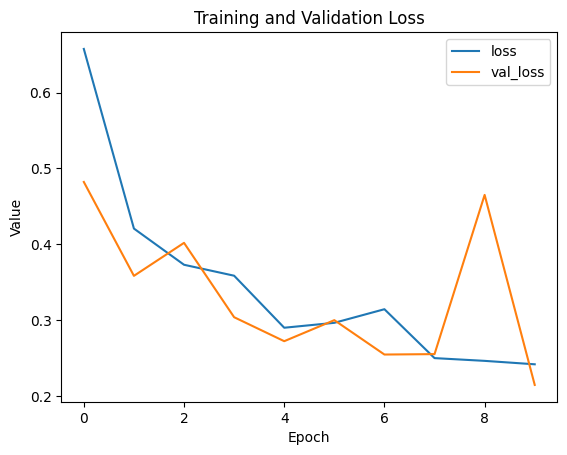

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [75]:
detectFromImage('/content/cat-and-dog-dataset/test_set/test_set/cats/cat.4001.jpg')

TypeError: detectFromImage() takes 0 positional arguments but 1 was given

In [24]:
# from google.colab import files
# import os

# def detectFromImage():
#   # Upload file
#   uploaded = files.upload()

#   # Assuming a single file is uploaded, get the file name
#   source_image = list(uploaded.keys())[0]

#   # Verify the file path
#   print(f"Source image: {source_image}")

#   image=cv.imread(source_image)
#   resized_image=cv.resize(image,image_size)
#   print(np.array(resized_image).shape)
#   # return model.predict([resized_image])

# detectFromImage()


KeyboardInterrupt: 

In [88]:
def getPredictions(img_path):
  image=cv.imread(img_path)
  resized_image=cv.resize(image,image_size)/255.0
  print(np.array(resized_image).shape)
  expanded_array = np.expand_dims(np.array(resized_image), axis=0)
  print(expanded_array.shape)
  predicted=model.predict(expanded_array)
  print(predicted[0][0])
  if (predicted[0][0] < 0.55):
    print('cat')
  else:
    print('dog')

getPredictions('/content/cat-and-dog-dataset/test_set/test_set/dogs/dog.4042.jpg')

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
0.99093294
dog
